[29 30 31 32 33 34 35 36 37 38 39 40 41 42]
fuck
fuck
fuck
<type 'list'>
11
47200
Coefficients: 
[[  2.44603425e-05]]


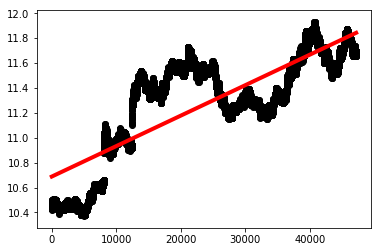

In [60]:
# %load trend_v3.py
import os
import sys
#sys.path.append("g:/stock/code")
from load_path import *
from package1.path import *
import numpy as np
import pandas as pd
import datetime
#from numpy._distributor_init import NUMPY_MKL
from sklearn.cluster import KMeans
import re
market='shenzhen'
from datetime import datetime
#stock_path=os.path.join(stock_index_path,market)
from package_readdata.read_data import *
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error, r2_score
import itertools



date1=datetime(2017,8,20).strftime('%Y-%m-%d')
date2=datetime(2017,9,6).strftime('%Y-%m-%d')
stk_num="000001"
stock_path1=os.path.join(vol_price_path,market,stk_num)
stk_list=os.listdir(stock_path1)


num_in=find_stock_in_date_range(stk_num,date1,date2)
print num_in

price1=[]
for fi1 in num_in:
    try:
        data_file="g:/stock/data/daily_price_volume/shenzhen/%s/%s" % (stk_num,stk_list[fi1])
        #print data_file
        df1=read_vol_price_data(data_file)
        price1.append(df1.price.values.tolist())  ### pandas value to list
        #print df1.head
    except:
        print 'fuck'

#print(__doc__)
###---------- linear regression input data
# print type(price1)
# print len(price1)
p1=list(itertools.chain(*price1)) ## merge multiple list into one
price2 = np.array(p1)  
# print len(price2)
x_input1=np.array(range(0,len(price2)))
x_input=x_input1.reshape(-1, 1)
y_input=price2.reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(x_input,y_input)
print 'Coefficients: \n', regr.coef_
#print 'coe: \n'


plt.scatter(x_input, y_input,  color='black')
plt.plot(x_input, regr.predict(x_input),color='red', linewidth=4)
plt.show()


